In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from model_selection class import train_test_split object
from sklearn.model_selection import train_test_split
# from linear_model class import LinearRegression object
from sklearn.linear_model import LinearRegression
#from metrics class import several different tools
from sklearn.metrics import r2_score, mean_squared_error

# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset
advertising=pd.read_csv('Advertising.csv')

In [4]:
# observe the dataset x1=TV ,x2=Radio , x3=Newspaper , Y=sales(target veriable)
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
# 3 predictor variable which are numeric 
# 1 target variable-numeric
# it has a target variable that means supervised learning. 
# target variable is numeric so we are going to apply regression model.

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe() # only works on the numeric features

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


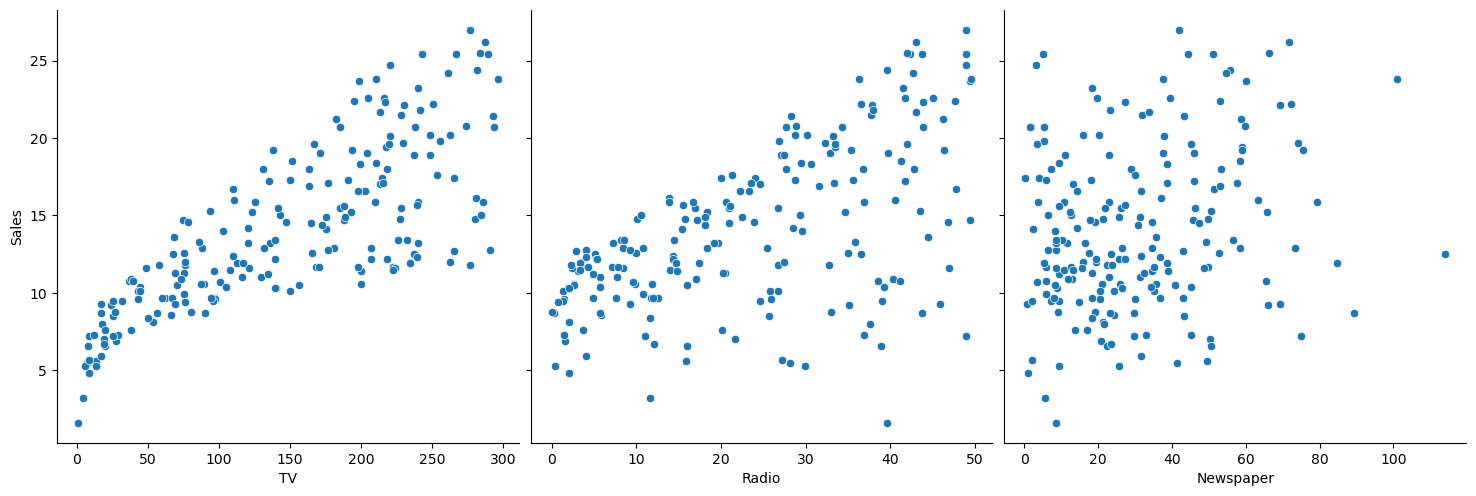

In [8]:
# Visualization
sns.pairplot(advertising,x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=5)

In [9]:
# TV and sales has a strong linear relationship.
# radio and sales is also has upto some strength linear relationship
#Newspaper and sales has not any linear relationshiop

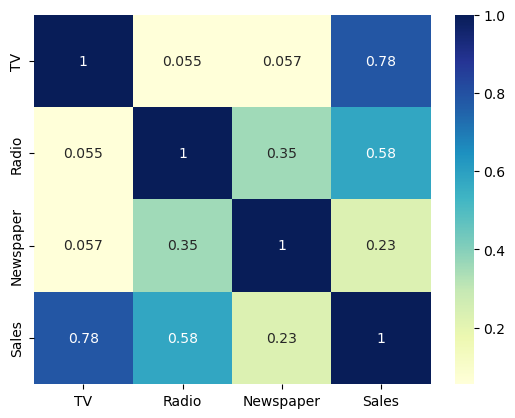

'it will help to understand two things\n1. It will tell us about the correlation between each predictor variable\ntarget variable.\n2. it will also tell us if the predictor variables are infulencing each\nother (related to each other). If there are any strong correlation between\ntwo predictor variables. Suppose if there any strong corelation between \ntwo predictor variables that means multicolinearity is present. so to \navoid multicolinearity one predictor variables should drop.'

In [10]:
# Analysing correlation with the help of heatmap
sns.heatmap(advertising.corr(),cmap='YlGnBu',annot=True)
plt.show()
'''it will help to understand two things
1. It will tell us about the correlation between each predictor variable
target variable.
2. it will also tell us if the predictor variables are infulencing each
other (related to each other). If there are any strong correlation between
two predictor variables. Suppose if there any strong corelation between 
two predictor variables that means multicolinearity is present. so to 
avoid multicolinearity one predictor variables should drop.'''

In [11]:
# Analyzing multicoliniarity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_new=advertising[['TV','Radio','Newspaper']]


In [12]:
'''when we try to analyze multicolinearity we have to deal with the predictor
variables only.
we can also do like this:
X_new=advertising.drop('Sales')
'''
X_new

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [13]:
# in order to make it more presentable and easy to read we make a dataframe
vif_data=pd.DataFrame() # blank data frame
vif_data['feature']=X_new.columns # dataframe has one column name feature
vif_data

#and it has three element in it which are names of the columns of X_new



,feature
0,TV
1,Radio
2,Newspaper


In [14]:
# calculating VIF for each feature
vif_data['VIF']=[variance_inflation_factor(X_new,i) for i in range(3)]
# list comprehension
print(vif_data)

     feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


####In VIF method we give the entire predictor variables dataframe. than 1 at 
a time it will pickup each column and find its VIF. if it is grater than 5
than this feature is related to some other feture. And we are storing it my 
new column in my new vif_data.

In [15]:
vif_data['Multicolinear']=['yes' if vif_data['VIF'][i]>5 else 'no' for  i in range(3)]

In [16]:
vif_data

,feature,VIF,Multicolinear
0,TV,2.486772,no
1,Radio,3.285462,no
2,Newspaper,3.055245,no


In [17]:
# defining the independent and dependent variables in the dataset.
# presently work only with on independent variable 'TV'.
# when the model is based on one independent variable it result in simple 
# linear Model
X=advertising["TV"]
y=advertising['Sales']

In [18]:
# Split the data into train and test (with split ratio=10-30)
X_train, X_test ,y_train , y_test=train_test_split(X,y,
                                                  train_size=0.7,
                                                  test_size=0.3,
                                                  random_state=5)

#### if you mention train_size then you don't have to mention test_size and vice versa

In [19]:
X_train


170     50.0
182     56.2
59     210.7
185    205.0
12      23.8
       ...  
73     129.4
144     96.2
118    125.7
189     18.7
99     135.2
Name: TV, Length: 140, dtype: float64

In [20]:
type(X_train)

pandas.core.series.Series

In [21]:
X_train.shape
# this is one D array. but for scaling it requires 2D Array.

(140,)

In [22]:
X_train=X_train.values.reshape(-1,1)
# you want to convert data in one column
X_test=X_test.values.reshape(-1,1)
# Y is by default a single column only.
 

In [23]:
type(X_train)

numpy.ndarray

In [24]:
X_train.shape

(140, 1)

In [26]:
'''
Wherever the model is a distence based model always gp ahead and scaled down 
the numerical dataset. Since linear regression is a distence based model i.e.
in this we have to find best fit line. it work on a graph. so for linear re-
gression we have to scaled down the dataset.

'''

'\nWherever the model is a distence based model always gp ahead and scaled down \nthe numerical dataset. Since linear regression is a distence based model i.e.\nin this we have to find best fit line. it work on a graph. so for linear re-\ngression we have to scaled down the dataset.\n\n'

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)



### for the X_test data we anly do transform. we don do fit in it.
Q.1: can we scale the data before split?
    * Entire motive of split is that our model cannot come to the the X_tata
     which is the test data. if we scale before the split all training values
     are influenced by the test data set.(mean and standard deviation is 
                                         influenced by test data). so the 
    trained data already have some information about the test data. and that 
    problem is called data leacage.
    My training dataset should have no influence no essence, no shaddow of 
    test data at all.
# Bcoz Data Leakage
* X_test should be alined according to the training dataset. hence when i 
  transformed the data i ll not recalculate the mean and standard deviation
for it rather use which are calculate for training dataset. so we don have 
to do the fit again.


#### fit does the calculation at the backend and transform will apply the
formula

In [29]:
# instantiating the LinearRegression() Model
lm=LinearRegression()

In [31]:
# Training the model

# fitting the model and getting the parameter values:
lm.fit(X_train,y_train)
print(lm.intercept_) # constant
print(lm.coef_) # slope or regression coefficient or m

#lm.get_params
# slope is always be in a list format bcoz it might have three variable and
# and it has to give 3 slopes.

13.948571428571428
[4.3258742]


In [32]:
# inferencing- means doing the prediction
# we can do the prediction on the train data or the test data also.
# Finding the predicted values of Y
y_train_pred=lm.predict(X_train) 
# y_predicted for the trained data set and compare it with Y_train
y_test_pred=lm.predict(X_test)
# y_predicted for the test data set and compare it with Y_test

In [33]:
# Evaluation
# Calculating the metric for training and testing data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.6411433688483876
0.5111616978794155


####
here after seeing the r2 score of the feature we can see that it is not doing
a good job. may be we can have more feature and check again whether it is
doing a good job or not.

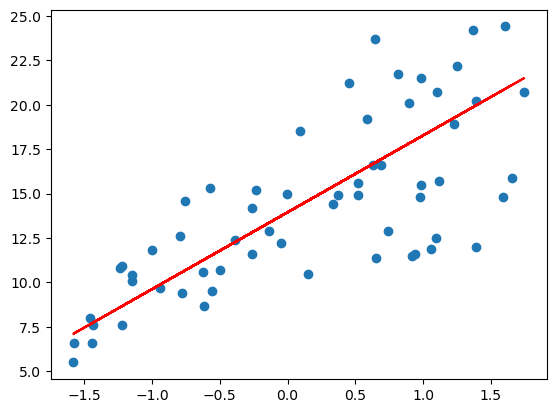

In [34]:
# y_pred=m*X_test+c
#y_pred=0.6411*X_test + 0.51116
plt.scatter(X_test,y_test)
plt.plot(X_test,13.948571428571428+4.3258742*X_test,'r')
plt.show()

In [40]:
# multiple line regression model( with more than 1 independent variable)
feature_cols=['TV','Radio','Newspaper']
X_all=advertising[feature_cols] # advertising[['TV','Radio','Newspaper']]
y=advertising.Sales # it can be written as advertising['Sales']



# Train_test_split the new data
X_all_train,X_all_test,y_train,y_test=train_test_split(X_all,y,train_size=0.7,random_state=0)

# scaling the data
X_all_train=ss.fit_transform(X_all_train)
X_all_test=ss.transform(X_all_test)

# instantiation and fit
lm2=LinearRegression()
lm2.fit(X_all_train,y_train)

# prediction of target variable
y_train_pred=lm2.predict(X_all_train)
y_test_pred=lm2.predict(X_all_test)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9065727532450596
0.8649018906637791


In [ ]:
# assignment
#1. to calculate the evaluation matrices at one place for both the models 
#      above (adj R2,RMSE)
# use: sklearn.metrics.mean_squared_reeor ( for RMSE)